In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import tifffile

from careamics.config import create_n2n_configuration
from careamics.dataset_ng.dataset.dataset import CareamicsDataset

/localscratch/mamba/envs/cmcs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
data_path = "/home/igor.zubarev/projects/microSplit-reproducibility/examples/2D/custom_test/data"

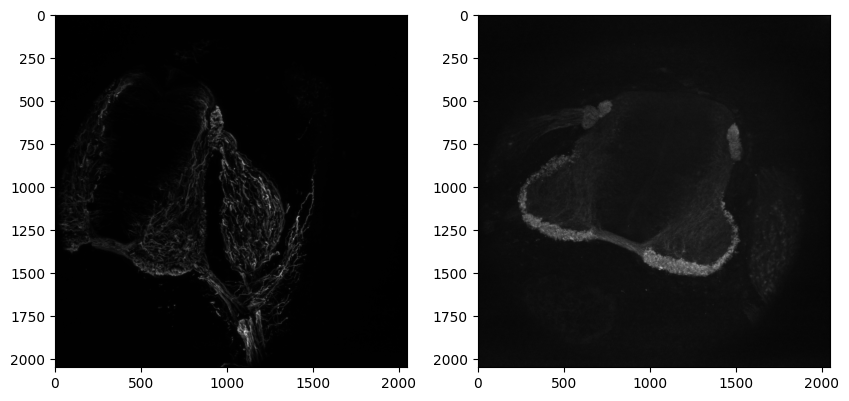

In [ ]:
ch1 = tifffile.imread(Path(data_path) / "ch1/Neurofilament_01.tif")
ch2 = tifffile.imread(Path(data_path) / "ch2/SV2_01.tif")

_, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(ch1, cmap="gray")
ax[1].imshow(ch2, cmap="gray")

In [ ]:
input_img = np.stack([ch1, ch2], axis=0)
print(input_img.shape)

(2, 2048, 2048)


### 1. From an array 

In [ ]:
# 1. Train val from an array

train_data_config = create_n2n_configuration(
    "test_exp",
    data_type="array",
    axes="CYX",
    n_channels_in=2,
    patch_size=(256, 256),
    batch_size=1,
    num_epochs=1,
    augmentations=[],
).data_config


# val_data_config = create_n2n_configuration(
#     "test_exp",
#     data_type="array",
#     axes="YX",
#     patch_size=(256, 256),
#     batch_size=1,
#     num_epochs=1,
#     augmentations=[],
# ).data_config

for i in train_data_config:
    print(i)

('data_type', 'array')
('axes', 'CYX')
('patch_size', [256, 256])
('batch_size', 1)
('image_means', None)
('image_stds', None)
('target_means', None)
('target_stds', None)
('transforms', [])
('patch_extractor_params', PatchExtractorConfig(multiscale_count=1, from_same_location=True, artificial_input=False, mixing_alpha=(0.5, 0.5)))
('train_dataloader_params', {'shuffle': True})
('val_dataloader_params', {})


In [14]:
train_dataset = CareamicsDataset(
    data_config=train_data_config, inputs=None, targets=[input_img]
)
# val_dataset = CareamicsDataset(
#     data_config=val_data_config, inputs=None, targets=[data_path]
# )

fig, ax = plt.subplots(2, 5, figsize=(10, 5))
ax[0, 0].set_title("Train input")
ax[1, 0].set_title("Train target")
for i in range(5):
    sample, target = train_dataset[i]
    # ax[0, i].imshow(sample.data[0])
    ax[1, i].imshow(target.data[0])

KeyboardInterrupt: 

### 2. From tiff 

In [7]:
train_data_config = create_n2n_configuration(
    "test_exp",
    data_type="tiff",
    axes="YX",
    patch_size=(32, 32),
    batch_size=1,
    num_epochs=1,
).data_config

val_data_config = create_n2n_configuration(
    "test_exp",
    data_type="tiff",
    axes="YX",
    patch_size=(32, 32),
    batch_size=1,
    num_epochs=1,
    augmentations=[],
).data_config

data = sorted(Path("./").glob("example_data*.tiff"))
targets = sorted(Path("./").glob("example_target*.tiff"))
train_dataset = CareamicsDataset(
    data_config=train_data_config, inputs=data, targets=targets
)
val_dataset = CareamicsDataset(
    data_config=val_data_config, inputs=data, targets=targets
)

fig, ax = plt.subplots(2, 5, figsize=(10, 5))
ax[0, 0].set_title("Train input")
ax[1, 0].set_title("Train target")
for i in range(5):
    sample, target = train_dataset[i]
    ax[0, i].imshow(sample.data[0])
    ax[1, i].imshow(target.data[0])

TypeError: expected str, bytes or os.PathLike object, not list

### 3. Prediction from array

In [ ]:
from careamics.config import InferenceConfig

prediction_config = InferenceConfig(
    data_type="array",
    tile_size=(32, 32),
    tile_overlap=(16, 16),
    axes="YX",
    image_means=(example_data.mean(),),
    image_stds=(example_data.std(),),
    tta_transforms=False,
    batch_size=1,
)
prediction_dataset = CareamicsDataset(
    data_config=prediction_config, inputs=[example_data]
)

fig, ax = plt.subplots(1, 5, figsize=(10, 5))
ax[0].set_title("Prediction input")
for i in range(5):
    sample, _ = prediction_dataset[i]
    ax[i].imshow(sample.data[0])

### 4. From custom data type 

In [ ]:
train_data_config = create_n2n_configuration(
    "test_exp",
    data_type="custom",
    axes="YX",
    patch_size=(32, 32),
    batch_size=1,
    num_epochs=1,
).data_config


def read_data_func_test(data):
    return 255 - example_data


fig, ax = plt.subplots(1, 5, figsize=(10, 5))
train_dataset = CareamicsDataset(
    data_config=train_data_config,
    inputs=[example_data],
    targets=[segmentation],
    read_func=read_data_func_test,
)

for i in range(5):
    sample, _ = train_dataset[i]
    ax[i].imshow(sample.data[0])